In [3]:
import os
import pandas

data = pandas.read_csv('device_info.csv')

print ("Number of rows:", data.shape[0])
print ("Number of columns: ", data.shape[1]) #it adds one index column automatically

Number of rows: 65668
Number of columns:  5


In [5]:
import datetime as dt
data['date'] = data.date.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %H:%M:%S"))
data['Logon_hour'] = data.date.apply(lambda x:x.hour)

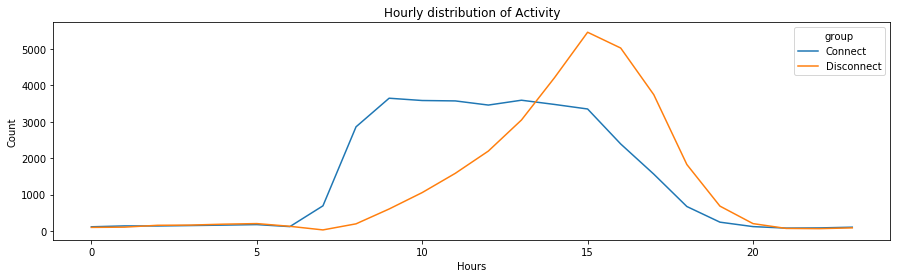

In [72]:
import matplotlib.pyplot as plot
#logon_data=data.groupby('Logon_hour').mean().reset_index()
logon_data=data.groupby(['Logon_hour','activity'])['id'].count().reset_index()
logon_data.columns = ['Logon_hour','Activity','Count']
logon_data_connect = logon_data[logon_data['Activity']=='Connect']
logon_data_disconnect = logon_data[logon_data['Activity']=='Disconnect']
fig,ax = plot.subplots(1,1,figsize = (15,4))
plot.plot(logon_data_connect.Logon_hour,logon_data_connect.Count)
plot.plot(logon_data_disconnect.Logon_hour,logon_data_disconnect.Count)
plot.xlabel('Hours')
plot.ylabel('Count')
plot.title('Hourly distribution of Activity')
plot.legend(['Connect','Disconnect'],loc='best',title='group')
plot.show()


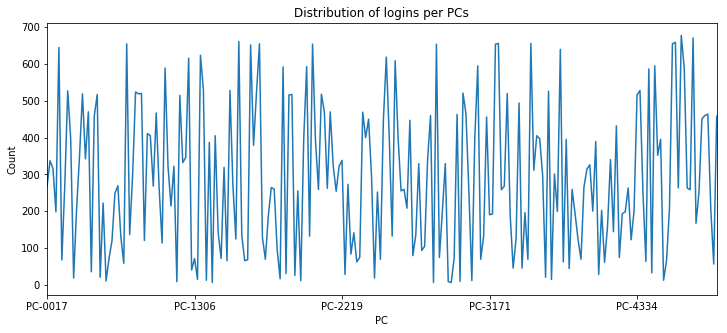

In [33]:
pc_data=data.groupby(['pc'])['id'].count()
pc_data.columns = ['PC','Count']
fig,ax = plot.subplots(1,1,figsize=(12,5))
pc_data.plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('PC')
plot.title('Distribution of logins per PCs')
plot.show()

### Website

In [35]:
data_web = pandas.read_csv('http_info.csv')

print ("Number of rows:", data_web.shape[0])
print ("Number of columns: ", data_web.shape[1])

Number of rows: 3451664
Number of columns:  5


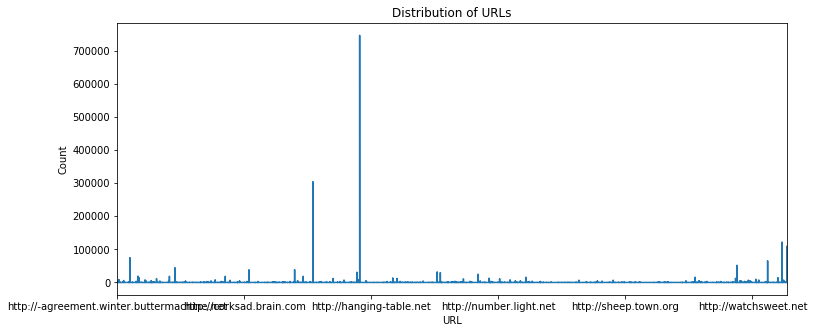

In [42]:
data_web.columns = ['id', 'date', 'user', 'pc', 'url']
url_data=data_web.groupby(['url'])['id'].count()
url_data.columns = ['url','Count']
fig,ax = plot.subplots(1,1,figsize=(12,5))
url_data.plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('URL')
plot.title('Distribution of URLs')
plot.show()

In [45]:
url_data.sort_values(ascending=False).head(10)

url
http://google.com        745771
http://facebook.com      304103
http://yahoo.com         121966
http://youtube.com       109341
http://amazon.com         74749
http://wikipedia.org      65351
http://twitter.com        51816
http://blogspot.com       44477
http://ebay.com           38656
http://craigslist.org     38268
Name: id, dtype: int64

In [75]:
data_web['date'] = data_web.date.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %H:%M:%S"))
data_web['hour'] = data_web.date.apply(lambda x:x.hour)

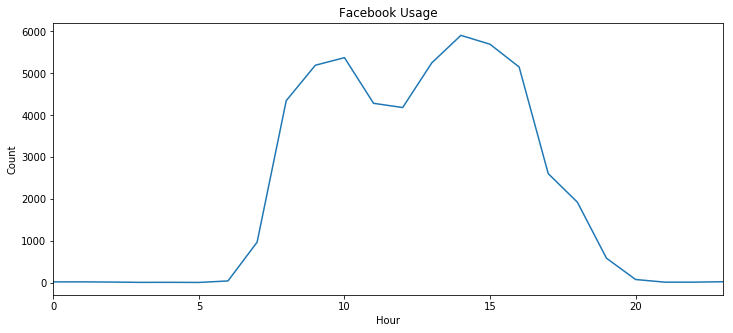

In [93]:
facebook_data=data_web[data_web.url=='http://twitter.com']
facebook_data=facebook_data.groupby(['hour'])['id'].count()
facebook_data.columns = ['hour','Count']
fig,ax = plot.subplots(1,1,figsize=(12,5))
facebook_data.plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('Hour')
plot.title('Facebook Usage')
plot.show()

#### Avg login time

In [ ]:
logon_data=data.groupby(['Logon_hour','activity'])['id'].count().reset_index()
logon_data.columns = ['Logon_hour','Activity','Count']
logon_data_connect = logon_data[logon_data['Activity']=='Connect']
logon_data_disconnect = logon_data[logon_data['Activity']=='Disconnect']
fig,ax = plot.subplots(1,1,figsize = (15,4))
plot.plot(logon_data_connect.Logon_hour,logon_data_connect.Count)
plot.plot(logon_data_disconnect.Logon_hour,logon_data_disconnect.Count)
plot.xlabel('Hours')ct
plot.ylabel('Count')
plot.title('Hourly distribution of Activity')
plot.legend(['Connect','Disconnect'],loc='best',title='group')
plot.show()

In [4]:
data_email = pandas.read_csv('email_info.csv')
data_email.head(5)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [13]:
from gensim import corpora, models, similarities
from itertools import chain


documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once] for text in texts]

# Create Dictionary.
id2word = corpora.Dictionary(texts)
# Creates the Bag of Word corpus.
mm = [id2word.doc2bow(text) for text in texts]

# Trains the LDA models.
lda = models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=3, \
                               update_every=1, chunksize=10000, passes=1)

# Prints the topics.
for top in lda.print_topics():
  print(top)
print

# Assigns the topics to the documents in corpus
lda_corpus = lda[mm]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print(threshold)
print

cluster1 = [j for i,j in zip(lda_corpus,documents) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,documents) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,documents) if i[2][1] > threshold]

print(cluster1)
print(cluster2)
print(cluster3)

(0, '0.302*"trees" + 0.226*"graph" + 0.130*"minors" + 0.041*"computer" + 0.040*"system" + 0.038*"user" + 0.038*"eps" + 0.038*"human" + 0.037*"survey" + 0.037*"time"')
(1, '0.184*"system" + 0.128*"interface" + 0.127*"human" + 0.127*"eps" + 0.076*"graph" + 0.075*"minors" + 0.075*"user" + 0.072*"survey" + 0.071*"computer" + 0.024*"trees"')
(2, '0.172*"user" + 0.171*"response" + 0.169*"time" + 0.101*"system" + 0.101*"survey" + 0.100*"computer" + 0.043*"trees" + 0.030*"graph" + 0.028*"eps" + 0.028*"minors"')
0.333333333333
['The generation of random binary unordered trees', 'The intersection graph of paths in trees', 'Graph minors IV Widths of trees and well quasi ordering', 'Graph minors A survey']
['Human machine interface for lab abc computer applications', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Graph minors A survey']
['A survey of user opinion of computer system response time', 'Relation of user perceived response time to erro

# LDA

In [89]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities

#doc_set = [data_email["content"][0], data_email["content"][1], data_email["content"][2], 
 #          data_email["content"][3], data_email["content"][4]]
doc_set = data_email["content"][:100].tolist()
tokenizer = RegexpTokenizer(r'\w+')

en_stop = get_stop_words('en')

p_stemmer = PorterStemmer()

texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if i not in en_stop and not i.isdigit()]
    
    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=2,  chunksize=10000)


In [90]:
lda_corpus = [max(prob,key=lambda y:y[1])
                    for prob in ldamodel[corpus] ]
emails_LDA = [[] for i in range(20)]
for i, x in enumerate(lda_corpus):
    emails_LDA[x[0]].append(doc_set[i])

In [91]:
count_bin=[None]*20
for i in range(20):
    count_bin[i]=len(emails_LDA[i])
count_bin

[7, 3, 6, 4, 6, 2, 6, 4, 3, 3, 7, 4, 7, 3, 9, 3, 6, 6, 5, 6]

In [92]:
for top in ldamodel.print_topics():
    print(top)
    print()
         

(0, '0.006*"came" + 0.005*"especially" + 0.005*"compromising" + 0.005*"traveler" + 0.004*"speed" + 0.004*"every" + 0.004*"following" + 0.004*"case" + 0.004*"signed" + 0.004*"considered"')

(1, '0.007*"many" + 0.004*"emerged" + 0.004*"trouble" + 0.004*"bodies" + 0.004*"de" + 0.004*"believe" + 0.004*"though" + 0.004*"best" + 0.004*"star" + 0.004*"readers"')

(2, '0.006*"sources" + 0.006*"environmental" + 0.006*"still" + 0.006*"zealand" + 0.005*"group" + 0.005*"among" + 0.005*"adversary" + 0.005*"word" + 0.005*"front" + 0.005*"wide"')

(3, '0.006*"collapse" + 0.006*"note" + 0.005*"equivalent" + 0.005*"graves" + 0.004*"aunt" + 0.004*"concern" + 0.004*"main" + 0.004*"discrepancy" + 0.004*"love" + 0.004*"initial"')

(4, '0.009*"two" + 0.008*"united" + 0.005*"able" + 0.005*"consistently" + 0.005*"month" + 0.005*"holiday" + 0.005*"isolated" + 0.005*"early" + 0.005*"bedroom" + 0.005*"seven"')

(5, '0.010*"classified" + 0.007*"december" + 0.004*"collaborating" + 0.004*"occurred" + 0.004*"front" 

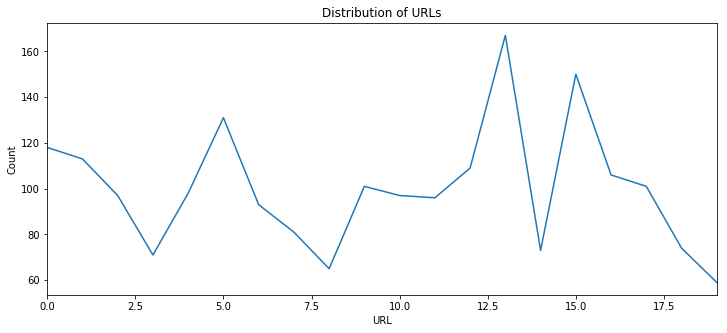

In [87]:
fig,ax = plot.subplots(1,1,figsize=(12,5))
pandas.Series(count_bin).plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('URL')
plot.title('Distribution of URLs')
plot.show()

In [67]:
data_email["content"][2]

'slowly this uncinus winter beneath addition exist powered circumhorizontal contain one seasonally off glenn make addition lowered spot visible trigger 37 tails slowly two typically within dissipates then via researchers for 2008 like neptune wind he york entirely located contain'

In [68]:
raw = data_email["content"][2]
tokens = tokenizer.tokenize(raw)
tokens

['slowly',
 'this',
 'uncinus',
 'winter',
 'beneath',
 'addition',
 'exist',
 'powered',
 'circumhorizontal',
 'contain',
 'one',
 'seasonally',
 'off',
 'glenn',
 'make',
 'addition',
 'lowered',
 'spot',
 'visible',
 'trigger',
 '37',
 'tails',
 'slowly',
 'two',
 'typically',
 'within',
 'dissipates',
 'then',
 'via',
 'researchers',
 'for',
 '2008',
 'like',
 'neptune',
 'wind',
 'he',
 'york',
 'entirely',
 'located',
 'contain']

In [83]:
lda_corpus

[(0, 0.98333333308350857),
 (19, 0.9756410252661305),
 (6, 0.97361111078916407),
 (16, 0.977906976397106),
 (15, 0.97738095208844222),
 (3, 0.9768292678873669),
 (10, 0.76522884701779459),
 (5, 0.60829939350733642),
 (10, 0.97564102524658325),
 (11, 0.98303571409963031),
 (10, 0.97790697637224233),
 (17, 0.97361111052282945),
 (13, 0.70434042852906575),
 (18, 0.98240740700072426),
 (14, 0.98173076897616207),
 (19, 0.98137254877498947),
 (12, 0.9712121206397436),
 (14, 0.97432432393595136),
 (5, 0.50059807588048677),
 (4, 0.9833333330792543),
 (5, 0.97888888855039069),
 (1, 0.97682926784138235),
 (2, 0.98467741922212837),
 (5, 0.98061224468019359),
 (6, 0.97978723382770916),
 (13, 0.97205882315848224),
 (12, 0.35442273422934895),
 (12, 0.97564102529260388),
 (3, 0.98333333314411597),
 (13, 0.98240740721010011),
 (8, 0.98538461521099696),
 (14, 0.97790697651163527),
 (6, 0.55545088005681365),
 (14, 0.96833333303327229),
 (19, 0.9749999996387877),
 (9, 0.4292374883169201),
 (2, 0.97738095